# Prework Required Exercises

## Question 1: Exercise 2.4

#### Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

#### Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [11]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2

Read in the data and then separate out the data for live births. We only want to look at live births for this exercise.

In [12]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [13]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [14]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
    Series if the arguments are DataFrame
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [15]:
cohen_prglngth = CohenEffectSize(firsts.prglngth, others.prglngth)
cohen_prglngth

0.028879044654449883

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [16]:
cohen_totalwgt = CohenEffectSize(others.totalwgt_lb, firsts.totalwgt_lb,)
cohen_totalwgt

0.088672927072602

In [17]:
cohen_totalwgt-cohen_prglngth

0.059793882418152124

   First babies are not lighter than others, in fact they have nearly the same weight. The Cohen effect size shows that the total weight of first babies is 0.089 standard deviations away from the total weight of other babies. According to this article in [Pychology Today](https://www.simplypsychology.org/effect-size.html#:~:text=Cohen%20suggested%20that%20d%20%3D%200.2,if%20it%20is%20statistically%20significant)
"Cohen suggested that d = 0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant." Since d = 0.089, the difference is trivial.

  The Cohen effect size of pregnancy length and total weight of first vs other babies is 0.029. This is also a trival effect size. The difference between the Cohen effect size for total weight and the Cohen effect size for pregnancy length is just 0.06. This is such a small amount that one can conclude that the order of birth is not influenced greater by either the pregnancy length or the total weight of the baby. 

## Question 2: Exercise 3.1

#### Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

#### Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

#### Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

#### Plot the actual and biased distributions, and compute their means.

In [66]:
import thinkstats2
import thinkplot

According to the NSFG codebook, the NUMKDHH variable is the number of of bio/adopt/related/legal children under age 18 in household. To access this variable, you must pull from the Female Respondent File

In [67]:
responses = nsfg.ReadFemResp()

Compute the actual distribution for the number of children under 18 in the household

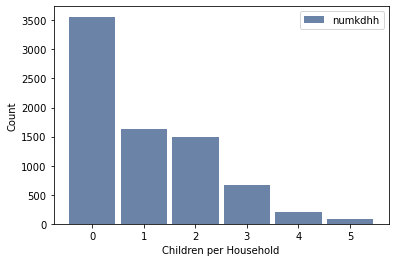

In [68]:
hist = thinkstats2.Hist(responses.numkdhh, label='numkdhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Children per Household', ylabel='Count')

This histogram shows the distribution of number of children per household, however we should normalize this distribution by using the Probability Mass Function (PMF)

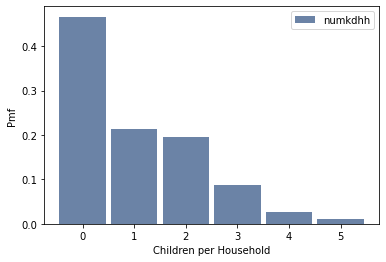

In [69]:
pmf = thinkstats2.Pmf(responses.numkdhh, label='numkdhh')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Children per Household', ylabel='Pmf')

This histogram shows the distribution for all respondents. Now we can compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household. We can use the below function to compute the biased PMF we would get if only households with children were surveyed:

In [70]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and biased distributions.

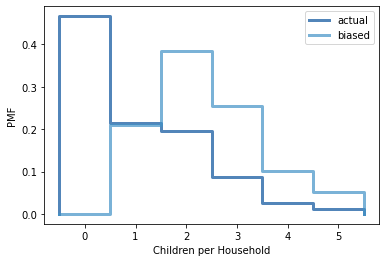

In [71]:
pmf = thinkstats2.Pmf(responses.numkdhh, label='actual')
biased_pmf = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Children per Household', ylabel='PMF')

The actual mean is 1.37 lower than the observed (or biased) mean. You can round this down and conclude that the actual mean has approximately 1 child less per household than the observed (biased) mean.

In [73]:
print('Actual mean:', pmf.Mean())
print('Observed (biased) mean:', biased_pmf.Mean())
print('Difference between means:', biased_pmf.Mean()-pmf.Mean())

Actual mean: 1.024205155043831
Observed (biased) mean: 2.403679100664282
Difference between means: 1.3794739456204512


## Question 3: Exercise 4.2

#### The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

#### Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [144]:
import numpy as np
import pandas as pd

In [145]:
import thinkstats2
import thinkplot

In [146]:
hist = thinkstats2.Hist(np.random.random(1000), label="numbers")

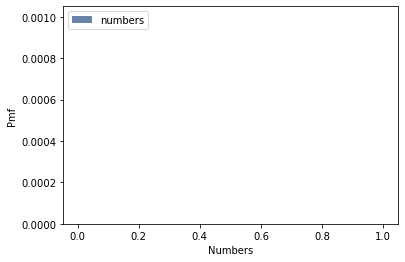

In [147]:
pmf = thinkstats2.Pmf(hist, label='numbers')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Numbers', ylabel='Pmf')

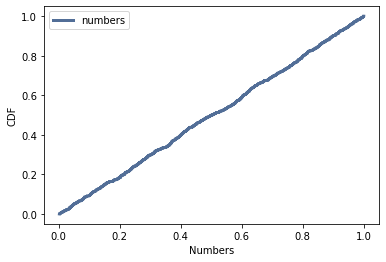

In [148]:
cdf = thinkstats2.Cdf(hist, label='numbers')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Numbers', ylabel='CDF')

The CDF is a straight line, which shows that the distribution is uniform. 

## Question 4: Exercise 5.1

#### In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

#### In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [151]:
import scipy.stats

In [152]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [153]:
dist.mean(), dist.std()

(178.0, 7.7)

In [154]:
dist.cdf(mu-sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [161]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

dist.cdf(177.8-185.42)

1.0684874724270261e-128

In [163]:
EvalNormalCdf(177.8)

1.0

In [164]:
EvalNormalCdf(185.42)

1.0

In [191]:
min_height = dist.cdf(177.8)
max_height = dist.cdf(185.4)
percent_in_range = (max_height - min_height)*100
print('Percentage of male adults:', round(percent_in_range,0))

Percentage of male adults: 34.0


## Question 5

#### Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way.  It helps incorporate conditional probabilities into our conclusions.

#### Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

Identical Twin Sample Space: BB, GG

Fraternal Twin Sample Space: GB, BG, BB, GG

Given the above sample spaces as well as the information given in the problem, here are the probabilities that we know:

In [14]:
p_frat_twin = 1/125
p_iden_twin = 1/300
p_both_boys_iden_twin = 1/2
p_both_boys_frat_twin = 1/4

Next, you can determine the conditional probabilities:

In [16]:
p_iden_twin_and_twin_bro = p_iden_twin * p_both_boys_iden_twin
p_frat_twin_and_twin_bro = p_frat_twin * p_both_boys_frat_twin

In [17]:
p_twin_bro = p_iden_twin_and_twin_bro + p_frat_twin_and_twin_bro

The following formula uses Baye's Theorum to determine the probability that Elvis is an identical twin

In [18]:
p_iden_twin_given_twin_bro = p_iden_twin_and_twin_bro / p_twin_bro
p_iden_twin_given_twin_bro

0.45454545454545453

## Question 6

#### How do frequentist and Bayesian statistics compare?

  Frequentist and Bayesian approaches interpret probability diferently. Frequentists believe that probability can only be assigned to events with long-term frequencies. For example, rolling a die is a repeatable random event and therefore frequentists believe that one can determine probabilites related to this event. Conversely, a frequentist would not assign probabilites to an event such as who will win the 100 meter dash in the Olympics. This is not a repeatable random event that will happen again (with the same people and the same conditions).
  A Bayesian approach uses inference to determine probabilites of events (even those without long-term frequecy). In Bayesian statistics a probability distribution is created by using Bayes' theorem and the knowledge of prior probabilites. Frequentists believe that assigning these prior probabilites to the problem at hand without being subjective is impossible, and therefore the Bayesian approach is flawed.
  
Information from: [Probabilistic World](https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/#:~:text=Frequentist%20inference%20is%20based%20on,in%20definitions%203%20and%204.&text=In%20contrast%2C%20Bayesians%20view%20probabilities,in%20any%20event%20or%20hypothesis.)